In [34]:
import pandas as pd
import numpy as np
import glob
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#find all files in the S1_Dataset. Note:- remove the readme file.
path=r'Datasets_Healthy_Older_People/S1_Dataset'
all_files=glob.glob(path+'/*')
print(all_files)

['Datasets_Healthy_Older_People/S1_Dataset\\d1p01M', 'Datasets_Healthy_Older_People/S1_Dataset\\d1p02M', 'Datasets_Healthy_Older_People/S1_Dataset\\d1p03M', 'Datasets_Healthy_Older_People/S1_Dataset\\d1p04M', 'Datasets_Healthy_Older_People/S1_Dataset\\d1p05M', 'Datasets_Healthy_Older_People/S1_Dataset\\d1p06M', 'Datasets_Healthy_Older_People/S1_Dataset\\d1p07M', 'Datasets_Healthy_Older_People/S1_Dataset\\d1p08F', 'Datasets_Healthy_Older_People/S1_Dataset\\d1p09F', 'Datasets_Healthy_Older_People/S1_Dataset\\d1p10F', 'Datasets_Healthy_Older_People/S1_Dataset\\d1p11F', 'Datasets_Healthy_Older_People/S1_Dataset\\d1p12F', 'Datasets_Healthy_Older_People/S1_Dataset\\d1p13F', 'Datasets_Healthy_Older_People/S1_Dataset\\d1p14F', 'Datasets_Healthy_Older_People/S1_Dataset\\d1p15F', 'Datasets_Healthy_Older_People/S1_Dataset\\d1p16F', 'Datasets_Healthy_Older_People/S1_Dataset\\d1p17F', 'Datasets_Healthy_Older_People/S1_Dataset\\d1p18F', 'Datasets_Healthy_Older_People/S1_Dataset\\d1p19F', 'Datasets_H

In [4]:
li=[]
for file in all_files:
    #print(file)
    if file.endswith('.txt'):
        continue
    df=pd.read_csv(file,header=None,index_col=None)
    li.append(df)
df1=pd.concat(li,axis=0,ignore_index=True)


In [24]:
df1.columns=['Time','Acc. Front','Acc. vert','Acc. Lat','id','RSSI','Phase','Freq','Activity']
df1.head()


,Time,Acc. Front,Acc. vert,Acc. Lat,id,RSSI,Phase,Freq,Activity
0,0.00,0.27203,1.00820,-0.082102,1,-63.5,2.4252,924.25,1
1,0.50,0.27203,1.00820,-0.082102,1,-63.0,4.7369,921.75,1
2,1.50,0.44791,0.91636,-0.013684,1,-63.5,3.0311,923.75,1
3,1.75,0.44791,0.91636,-0.013684,1,-63.0,2.0371,921.25,1
4,2.50,0.34238,0.96229,-0.059296,1,-63.5,5.8920,920.25,1


In [6]:
#check for null
df1.isnull().values.any()

False

## Normalization and Standardization

In [10]:
#Standardize the inputs
normalize=Normalizer()
X=normalize.fit_transform(X)


In [22]:
np.unique(df1['id'])

array([1, 2, 3, 4], dtype=int64)

## Statistics

In [36]:
df1.describe()

,Time,Acc. Front,Acc. vert,Acc. Lat,id,RSSI,Phase,Freq,Activity
count,52482.000000,52482.000000,52482.000000,52482.000000,52482.000000,52482.000000,52482.000000,52482.000000,52482.000000
mean,235.001862,0.805042,0.377804,0.007710,2.360752,-58.430814,3.275907,922.762261,2.375996
std,148.256886,0.396362,0.468899,0.180674,1.261542,4.611220,2.240341,1.693769,0.941795
min,0.000000,-0.748080,-0.553490,-0.481210,1.000000,-70.000000,0.000000,920.250000,1.000000
25%,117.980000,0.424460,-0.025263,-0.093505,1.000000,-61.500000,0.951070,921.250000,1.000000
50%,227.665000,0.952100,0.135500,-0.025087,3.000000,-57.500000,4.072700,922.750000,3.000000
75%,325.750000,1.128000,0.916360,0.066138,4.000000,-56.500000,5.425700,924.250000,3.000000
max,730.250000,1.503200,2.030200,1.217800,4.000000,-38.500000,6.281700,925.750000,4.000000


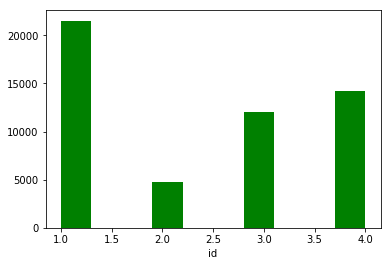

In [28]:
plt.hist(df1['id'],facecolor='green')
plt.xlabel('id')
plt.show()

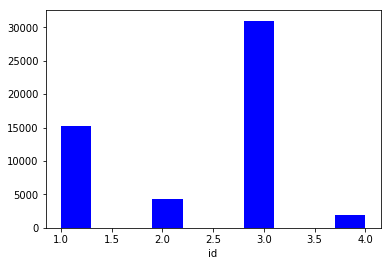

In [30]:
plt.hist(df1['Activity'],facecolor='blue')
plt.xlabel('id')
plt.show()

In [32]:
pd.crosstab(df1.id, df1.Activity)

Activity,1,2,3,4
id,,,,
1,9660,552,10569,729
2,17,3828,11,873
3,1648,1,10316,78
4,3837,0,10087,276


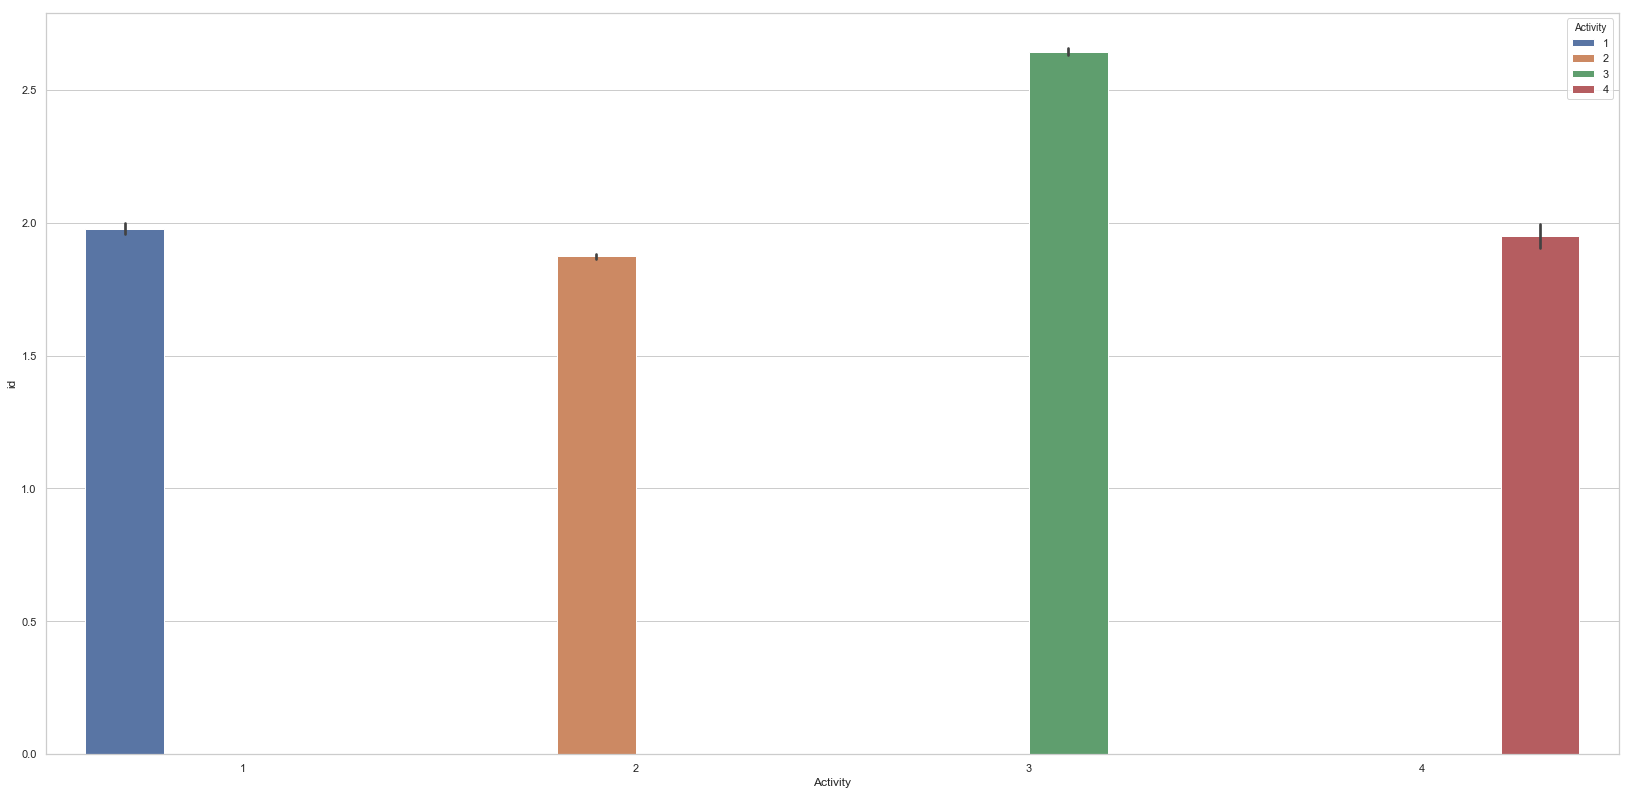

In [35]:
sb.set(style="whitegrid")
fig = plt.figure(figsize=(62,30))
ax1 = fig.add_subplot(223)
ax1 = sb.barplot(x="Activity",y="id", hue="Activity", data=df1)

## Implementation using inbuilt modules

In [8]:
cols=len(df1.columns)-1
df11=df1.values
X=df11[:, :8]
Y=df11[:,8]

In [9]:
X.shape, Y.shape

((52482, 8), (52482,))

In [11]:
print(X)

[[ 0.00000000e+00  2.93631563e-04  1.08825991e-03 ... -6.85424559e-02
   2.61778211e-03  9.97643541e-01]
 [ 5.41175984e-04  2.94432206e-04  1.09122725e-03 ... -6.81881739e-02
   5.12699303e-03  9.97657926e-01]
 [ 1.61998019e-03  4.83736884e-04  9.89656697e-04 ... -6.85791613e-02
   3.27354797e-03  9.97637799e-01]
 ...
 [ 4.64054952e-01  3.16054398e-04  9.08811718e-04 ... -5.78276511e-02
   4.78430619e-03  8.83902815e-01]
 [ 4.65829320e-01  1.14107909e-04  7.86629014e-04 ... -5.34284525e-02
   4.68329008e-03  8.83239105e-01]
 [ 4.67376010e-01  6.95187748e-05  1.26064817e-03 ... -5.40291449e-02
   9.91649969e-04  8.82396344e-01]]


In [12]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

### Logistic Regression

In [13]:
# going for Logistic Regression
lr=LogisticRegression()
estimator={'solver':('newton-cg','liblinear','lbfgs','sag')}
gsc=GridSearchCV(lr,estimator)
gsc.fit(X_train,Y_train)
y_gsc_pred=gsc.predict(X_test)
print("accuracy gsc= ",accuracy_score(Y_test,y_gsc_pred))
print(gsc.best_estimator_)


accuracy gsc=  0.5967532962426644
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='sag',
          tol=0.0001, verbose=0, warm_start=False)


### Decision Tree

In [16]:
clf = tree.DecisionTreeClassifier().fit(X_train, Y_train)
predicted = clf.predict(X_test)
print("Accuracy using the decision tree inbuilt module = ",accuracy_score(Y_test, predicted))
#tree.plot_tree(clf) 

Accuracy using the decision tree inbuilt module =  0.9907781419099154


### Random Forest

In [18]:
# Going for Random Forest
rforest=RandomForestClassifier()
rforest.fit(X_train,Y_train)
y_pred_rforest=rforest.predict(X_test)
print("accuracy Random Forest= ",accuracy_score(Y_test,y_pred_rforest))

accuracy Random Forest=  0.9932931941163021


## Implementation from scratch Logistic Regression

In [14]:
def softmax(Z):
    exp_Z = np.exp(Z)
    softmax_probs = exp_Z/ np.sum(exp_Z, axis=1, keepdims = True) # [N X K]
    return softmax_probs

In [15]:
def loss(probs, num_examples, y):
    correct_logprobs = -np.log(probs[range(num_examples),y])
    data_loss = np.sum(correct_logprobs)/num_examples
    return data_loss

In [18]:
y.reshape(-1,1).shape


(39361, 1)

In [20]:
X = X_train
y = Y_train
y = y.astype('int')
D = 8
K=5

W = 0.01 * np.random.randn(D,K)   # initialize parameters randomly
b = np.zeros((1,K))
print(X.shape, y.shape, W.shape, b.shape)
alpha = 0.1
num_examples = X.shape[0]

for i in range(1101):
  
    Z = np.dot(X, W) + b 
    softmax_probs = softmax(Z)
    data_loss = loss(softmax_probs, num_examples, y)
    if i % 100 == 0:
        print("iteration %d: loss %f" % (i, data_loss))

    dZ = softmax_probs
    dZ[range(num_examples),y] -= 1
    dZ /= num_examples

    dW = np.dot(X.T, dZ)
    db = np.sum(dZ, axis=0, keepdims=True)
    W += -alpha * dW
    b += -alpha * db

(39361, 8) (39361,) (8, 5) (1, 5)
iteration 0: loss 1.597975
iteration 100: loss 1.020466
iteration 200: loss 1.000407
iteration 300: loss 0.990303
iteration 400: loss 0.983244
iteration 500: loss 0.977783
iteration 600: loss 0.973369
iteration 700: loss 0.969715
iteration 800: loss 0.966647
iteration 900: loss 0.964043
iteration 1000: loss 0.961817
iteration 1100: loss 0.959902


In [21]:
scores = np.dot(X_test, W) + b
predicted_class = np.argmax(scores, axis=1)
print('training accuracy: %.2f' % (np.mean(predicted_class == Y_test)))

training accuracy: 0.58
